In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
sns.set()


In [2]:
#Data used to train the data for the 
dataset = pd.read_csv('stockerbot-export1.csv')

In [3]:
# dataset.head()

In [4]:
dataset = dataset.drop('id',axis=1)

In [5]:
# dataset.isnull().sum()

In [6]:
dataset['url'] = dataset['url'].fillna('http://www.NULL.com')

In [10]:
pat1 = r'@[A-Za-z0-9]+' # this is to remove any text with @....
pat2 = r'https?://[A-Za-z0-9./]+'  # this is to remove the urls
combined_pat = r'|'.join((pat1, pat2)) 
pat3 = r'[^a-zA-Z]' # to remove every other character except a-z & A-Z
combined_pat2 = r'|'.join((combined_pat,pat3)) # we combine pat1, pat2 and pat3 to pass it in the cleaning steps

In [11]:
len(dataset['text'])

28440

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
cleaned_tweets = []

for i in range(0, len(dataset['text'])) :
    tweets = re.sub(combined_pat2,' ',dataset['text'][i])
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [ps.stem(word) for word in tweets if not word in set(stopwords.words('english'))]
    tweets = ' '.join(tweets)
    cleaned_tweets.append(tweets)

In [13]:
cleaned_tweets[:10]

['video offic mind busi david solomon tell gs intern learn wa',
 'price lumber lb f sinc hit ytd high maci turnaround still happen',
 'say american dream dead',
 'barri silbert extrem optimist bitcoin predict new crypto entrant go zero',
 'satellit avoid attack space junk circl earth paid',
 'david butler favorit fang stock realmoneysod alphabet facebook',
 'miss convo one favorit thinker',
 'u intellig document nelson mandela made public',
 'senat want emerg alert go netflix spotifi etc',
 'hedg fund manag marc larsi say bitcoin k possibl']

In [14]:
dataset.columns

Index(['text', 'timestamp', 'source', 'symbols', 'company_names', 'url',
       'verified'],
      dtype='object')

In [15]:
dataset['cleaned_tweets'] = cleaned_tweets

In [16]:
cleaned_tweets

['video offic mind busi david solomon tell gs intern learn wa',
 'price lumber lb f sinc hit ytd high maci turnaround still happen',
 'say american dream dead',
 'barri silbert extrem optimist bitcoin predict new crypto entrant go zero',
 'satellit avoid attack space junk circl earth paid',
 'david butler favorit fang stock realmoneysod alphabet facebook',
 'miss convo one favorit thinker',
 'u intellig document nelson mandela made public',
 'senat want emerg alert go netflix spotifi etc',
 'hedg fund manag marc larsi say bitcoin k possibl',
 'u propos expedit appeal fight amp time warner purchas',
 'roger feder uniqlo deal make one athlet earn endors',
 'bond trader ahead jerom powel come inflat expect via',
 'alcoa cut adjust ebitda forecast cite tariff share slide',
 'custom urg boycott mgm resort casino file lawsuit mass shoot victim',
 'gap tighten race trillion dollar valuat amazon hit billion via',
 'presid trump endors brian kemp casey cagl georgia governor race',
 'white hous 

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
for tweet in cleaned_tweets[:10]:
    print(tweet)
    s = sia.polarity_scores(tweet)
    for k in sorted(s):
        print('{0}: {1}, '.format(k, s[k]), end='')
        print() 

video offic mind busi david solomon tell gs intern learn wa
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
price lumber lb f sinc hit ytd high maci turnaround still happen
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
say american dream dead
compound: -0.5106, 
neg: 0.518, 
neu: 0.241, 
pos: 0.241, 
barri silbert extrem optimist bitcoin predict new crypto entrant go zero
compound: 0.5267, 
neg: 0.0, 
neu: 0.746, 
pos: 0.254, 
satellit avoid attack space junk circl earth paid
compound: -0.6486, 
neg: 0.469, 
neu: 0.531, 
pos: 0.0, 
david butler favorit fang stock realmoneysod alphabet facebook
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
miss convo one favorit thinker
compound: -0.1531, 
neg: 0.286, 
neu: 0.714, 
pos: 0.0, 
u intellig document nelson mandela made public
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
senat want emerg alert go netflix spotifi etc
compound: 0.3612, 
neg: 0.0, 
neu: 0.632, 
pos: 0.368, 
hedg fund manag marc larsi say bitcoin k possibl
compound: 0

In [18]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [19]:
def findpolarity(data):
    sid = SentimentIntensityAnalyzer()
    polarity = sid.polarity_scores(data)
    if(polarity['compound'] >= 0.2):  
        sentiment = 1
    if(polarity['compound'] <= -0.2):
        sentiment = -1 
    if(polarity['compound'] < 0.2 and polarity['compound'] >-0.2):
        sentiment = 0     
    return(sentiment)

In [20]:
findpolarity(cleaned_tweets[0])

0

In [21]:
sentiment = []
for i in range(0, len(cleaned_tweets)):
    s = findpolarity(cleaned_tweets[i])
    sentiment.append(s)

In [22]:
len(sentiment)

28440

# Doing the analysis on the COAL INDIA LIMITED TWEET

In [34]:
cleaned_tweet = []
tweets = re.sub(combined_pat2,' ',"Coal India Limited declares Rs 68,000 performance-linked reward for its employees")
tweets = tweets.lower()
tweets = tweets.split()
tweets = [ps.stem(word) for word in tweets if not word in set(stopwords.words('english'))]
tweets = ' '.join(tweets)
cleaned_tweet.append(tweets)
cleaned_tweet

['coal india limit declar rs perform link reward employe']

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(cleaned_tweet[0])

{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.5719}

In [36]:
findpolarity(cleaned_tweet[0])

1

In [37]:
tweet_sentiment=findpolarity(cleaned_tweet[0])

# SCORING THE TWEETS



In [23]:
# dataset=pd.read_csv(r'E:\1THIRD_SEMESTER\SOCIAL_NETWORK_ANALYSIS\22oct_positive.csv')
dataset=pd.read_excel('22oct_positive.xlsx')

In [24]:
dataset

,created_at,id,id_str,text,truncated,entities__user_mentions__screen_name,entities__user_mentions__name,entities__user_mentions__id,entities__user_mentions__id_str,entities__user_mentions__indices__001,...,retweeted_status__favorited,retweeted_status__retweeted,retweeted_status__possibly_sensitive,retweeted_status__lang,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,Thu Oct 29 09:43:10 +0000 2020,1.321749e+18,1.321749e+18,RT @JoshiPralhad: Kudos to @CoalIndiaHQ on bea...,0.0,JoshiPralhad,Pralhad Joshi,2845994058,2845994058,3,...,0.0,0.0,0.0,en,0.0,157.0,0.0,0.0,0.0,en
1,NaN,NaN,NaN,NaN,NaN,CoalIndiaHQ,Coal India Limited,4808470694,4808470694,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Oct 29 09:33:59 +0000 2020,1.321747e+18,1.321747e+18,RT @JoshiPralhad: Kudos to @CoalIndiaHQ on bea...,0.0,JoshiPralhad,Pralhad Joshi,2845994058,2845994058,3,...,0.0,0.0,0.0,en,0.0,157.0,0.0,0.0,0.0,en
3,NaN,NaN,NaN,NaN,NaN,CoalIndiaHQ,Coal India Limited,4808470694,4808470694,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wed Oct 28 10:48:28 +0000 2020,1.321403e+18,1.321403e+18,RT @JoshiPralhad: Kudos to @CoalIndiaHQ on bea...,0.0,JoshiPralhad,Pralhad Joshi,2845994058,2845994058,3,...,0.0,0.0,0.0,en,0.0,157.0,0.0,0.0,0.0,en
5,NaN,NaN,NaN,NaN,NaN,CoalIndiaHQ,Coal India Limited,4808470694,4808470694,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Wed Oct 28 07:20:40 +0000 2020,1.321351e+18,1.321351e+18,RT @JoshiPralhad: Kudos to @CoalIndiaHQ on bea...,0.0,JoshiPralhad,Pralhad Joshi,2845994058,2845994058,3,...,0.0,0.0,0.0,en,0.0,157.0,0.0,0.0,0.0,en
7,NaN,NaN,NaN,NaN,NaN,CoalIndiaHQ,Coal India Limited,4808470694,4808470694,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Wed Oct 28 03:21:16 +0000 2020,1.321291e+18,1.321291e+18,RT @JoshiPralhad: Kudos to @CoalIndiaHQ on bea...,0.0,JoshiPralhad,Pralhad Joshi,2845994058,2845994058,3,...,0.0,0.0,0.0,en,0.0,157.0,0.0,0.0,0.0,en
9,NaN,NaN,NaN,NaN,NaN,CoalIndiaHQ,Coal India Limited,4808470694,4808470694,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
dataset.columns


Index(['created_at', 'id', 'id_str', 'text', 'truncated',
       'entities__user_mentions__screen_name', 'entities__user_mentions__name',
       'entities__user_mentions__id', 'entities__user_mentions__id_str',
       'entities__user_mentions__indices__001',
       ...
       'retweeted_status__favorited', 'retweeted_status__retweeted',
       'retweeted_status__possibly_sensitive', 'retweeted_status__lang',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang'],
      dtype='object', length=152)

In [27]:
new_data=dataset[['user__screen_name','user__location','user__followers_count','user__friends_count','user__statuses_count','retweeted_status__retweet_count','retweeted_status__favorite_count']]
new_data

,user__screen_name,user__location,user__followers_count,user__friends_count,user__statuses_count,retweeted_status__retweet_count,retweeted_status__favorite_count
0,CCmpdi,"Ranchi, India",114.0,4.0,385.0,157.0,371.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sanjaydubeykr,"Ranchi, Jharkhand",19.0,101.0,727.0,157.0,371.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VarshaR00326130,"Dhanbad, Jharkhand",2.0,9.0,209.0,157.0,371.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,dwivedi_aditya1,"Singrauli, MP",24.0,29.0,120.0,157.0,371.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ashishanchal,I m a cool guy frm ranchi.,16.0,152.0,107.0,157.0,371.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#score of reach
new_data.sum(axis = 0, skipna = True) 
total_followers = new_data['user__followers_count'].sum() 
total_following=new_data['user__friends_count'].sum()
likes=new_data['retweeted_status__favorite_count'][0]
retweeted=new_data['retweeted_status__retweet_count'][0]
total_followers, total_following,likes,retweeted

(1094.0, 794.0, 371.0, 157.0)

In [42]:
import math
score=tweet_sentiment*(math.log(total_followers)+likes+retweeted)
print('The score is: '+str(reach))


The score is: 534.9975959829819


Text(0.5, 1.0, 'stock price vs time')

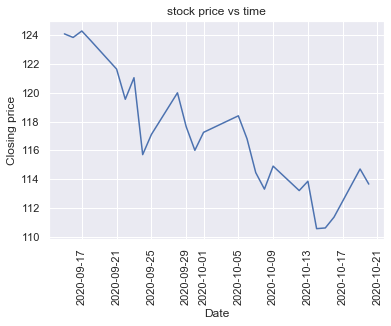

In [41]:
import pandas_datareader as dr
df=dr.data.get_data_yahoo('COALINDIA.NS', start='2020-09-15' ,end ='2020-10-20')
plt.plot(df['Close'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('stock price vs time')